# Modules

In [217]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Data

In [159]:
data= pd.read_csv("World Energy Consumption.csv")

In [160]:
data.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
ls_electricity_columns=["biofuel_electricity","coal_electricity","gas_electricity" ,"oil_electricity","nuclear_electricity","hydro_electricity",
                        "solar_electricity", "wind_electricity","other_renewable_electricity","other_renewable_exc_biofuel_electricity",
                        "fossil_electricity","renewables_electricity", "electricity_generation"]

In [163]:
data= data[["iso_code", "country", "year"]+ls_electricity_columns]

# Preprocessing

In [164]:
prepro=data[data["year"]>2010].copy()

## Missings

<AxesSubplot: >

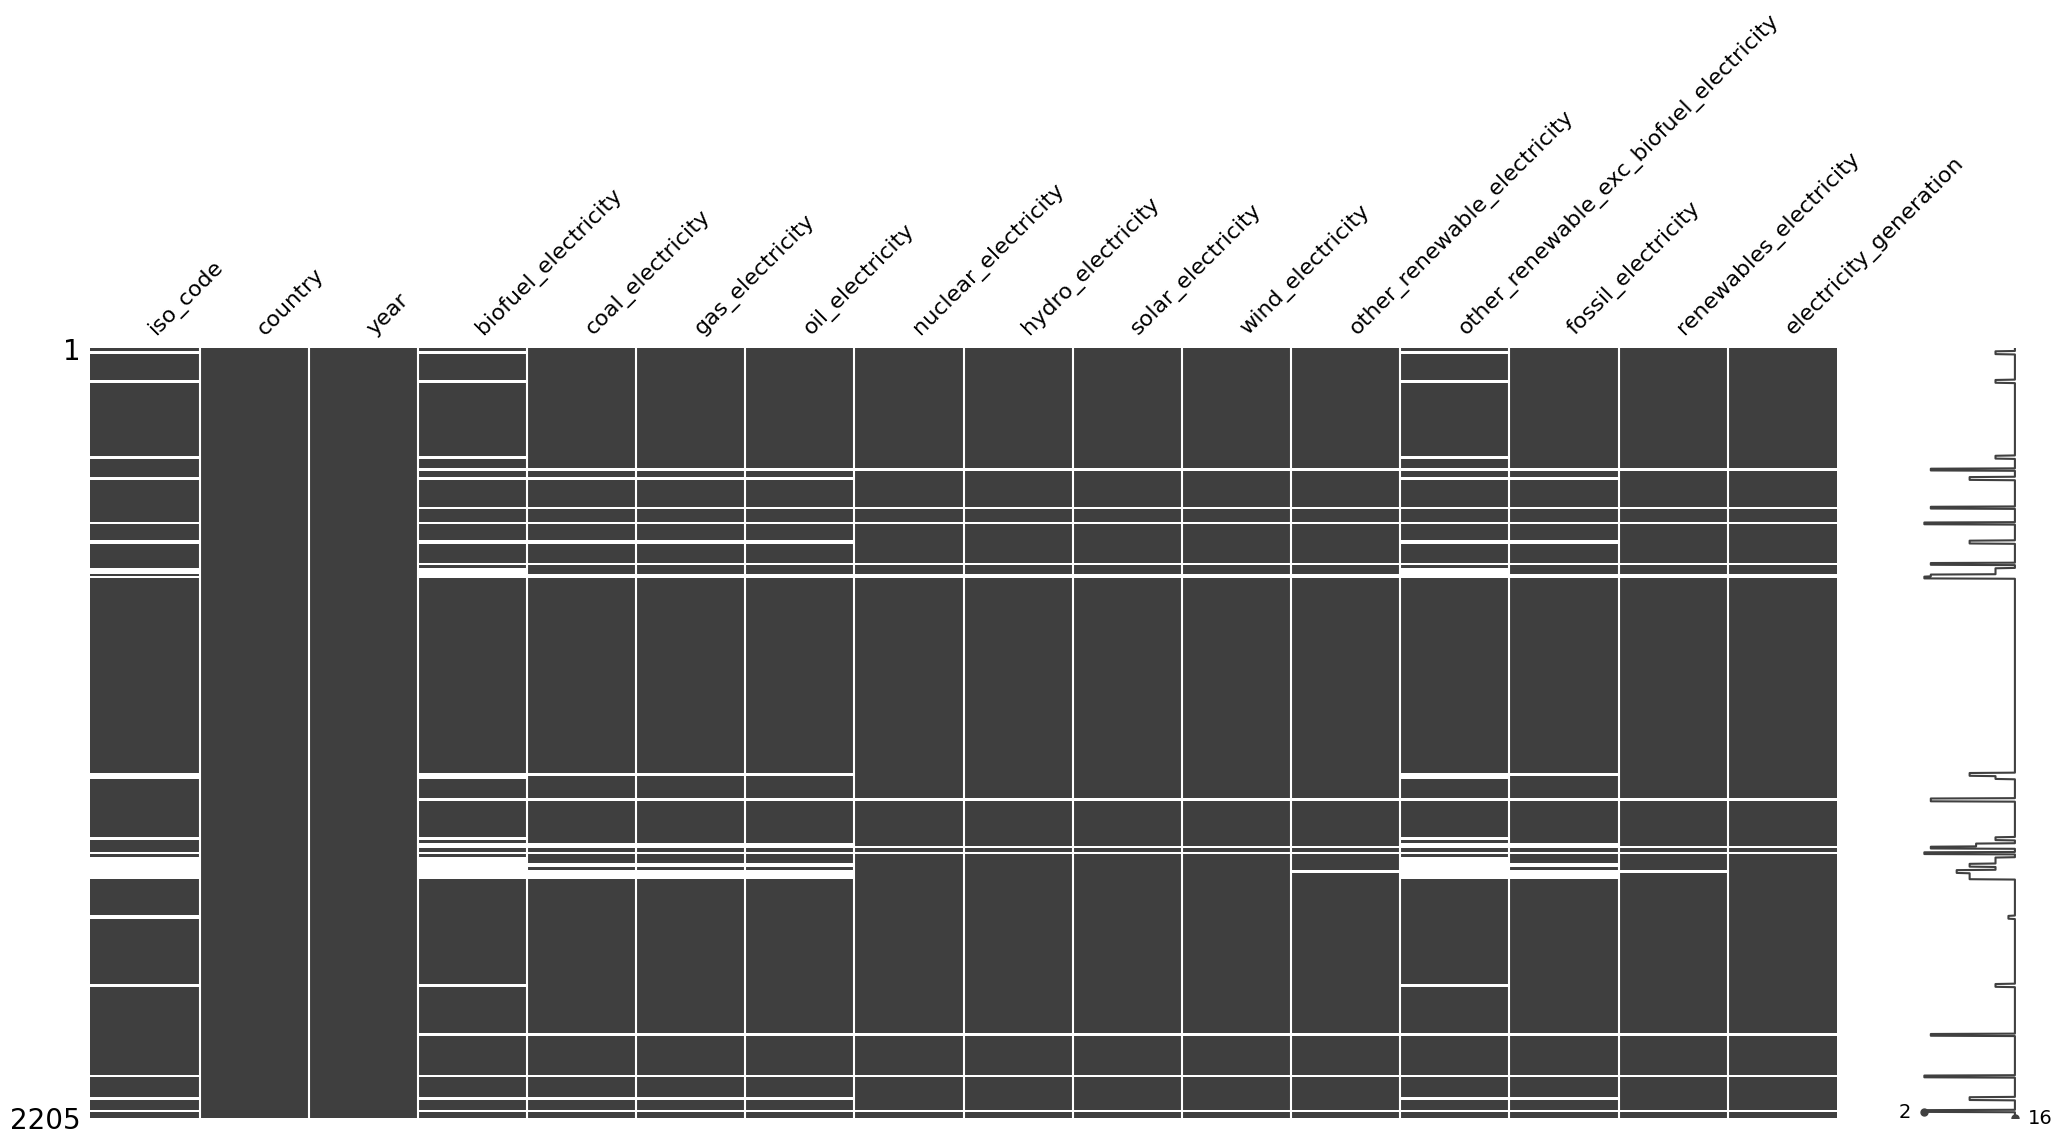

In [165]:
msno.matrix(prepro)

### Iso code

Podemos observar que los casos donde no tienen iso, son porque no es un pais, si no una zona, entonces procedemos a quitarlos

In [166]:
ls_zones= list(prepro[pd.isna(prepro["iso_code"])]["country"].unique())

In [167]:
ls_zones[:3]

['Africa', 'Asia Pacific', 'CIS']

In [168]:
prepro_iso =prepro.dropna(subset=["iso_code"]).copy()

<AxesSubplot: >

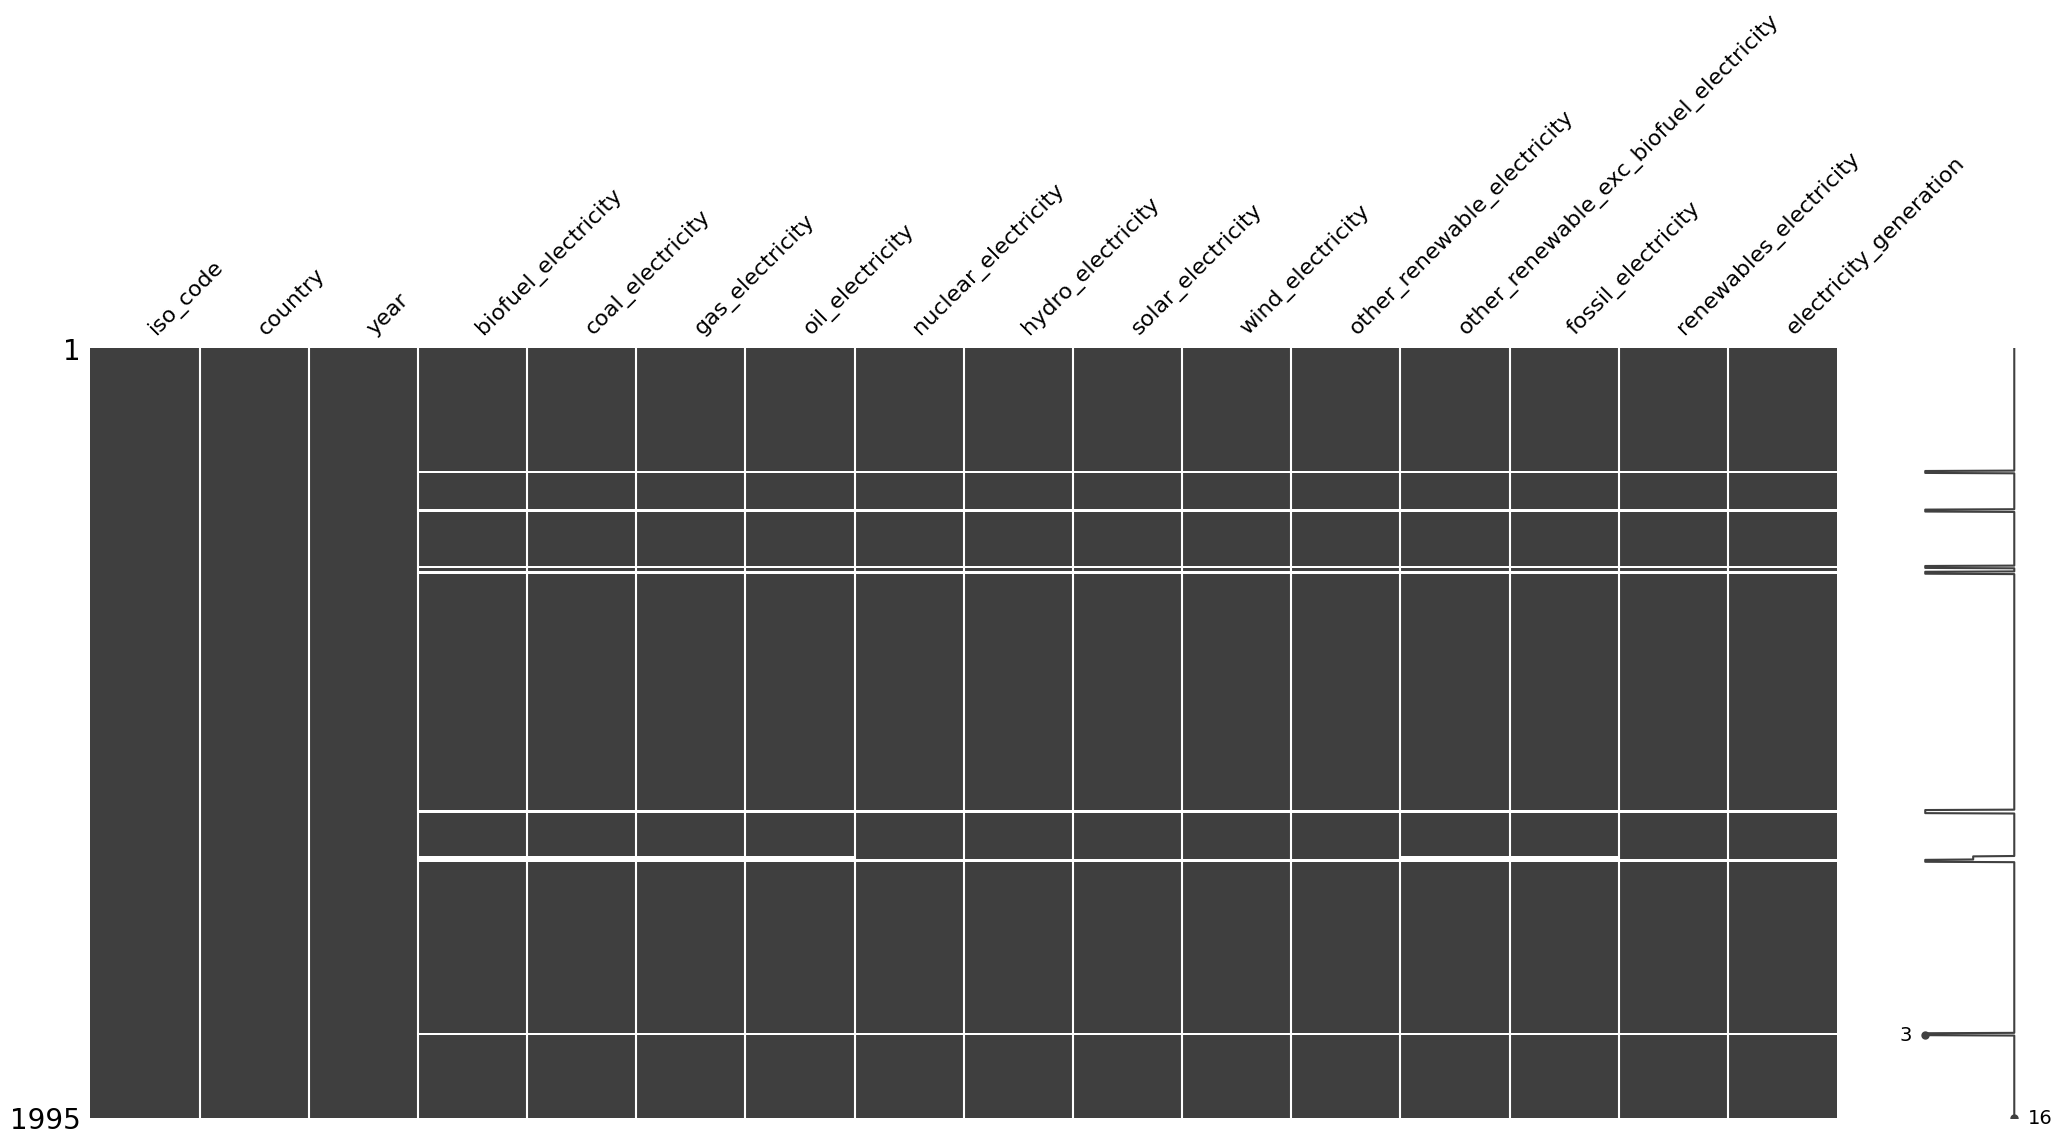

In [169]:
msno.matrix(prepro_iso)

Podemos notar ya datos con mayor consistencia y toca ver que paises no tienen todos sus valores 

### Rows empty

In [205]:
prepro_iso[pd.isna(prepro_iso["biofuel_electricity"])].sample(5)

,iso_code,country,year,biofuel_electricity,coal_electricity,gas_electricity,oil_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,fossil_electricity,renewables_electricity,electricity_generation
11417,MKD,North Macedonia,2019,NaN,NaN,NaN,NaN,0.0,1.164,0.023,0.102,0.055,NaN,NaN,1.344,5.87
11450,MNP,Northern Mariana Islands,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3043,CPV,Cape Verde,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3941,CIV,Cote d'Ivoire,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5239,SWZ,Eswatini,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos observar que se tienen paises relativamente pequeños y en lo cual al rededaro de los años se tiene poca información por lo cual se opta por eliminarlos

In [171]:
ls_drop_countries=list(prepro_iso[pd.isna(prepro_iso["biofuel_electricity"])]["country"].unique())

In [172]:
ls_countries= [x for x in list(prepro_iso.country.unique()) if x not in ls_drop_countries]

In [173]:
prepro_iso_full =prepro_iso[prepro_iso["country"].isin(ls_countries)].copy()

<AxesSubplot: >

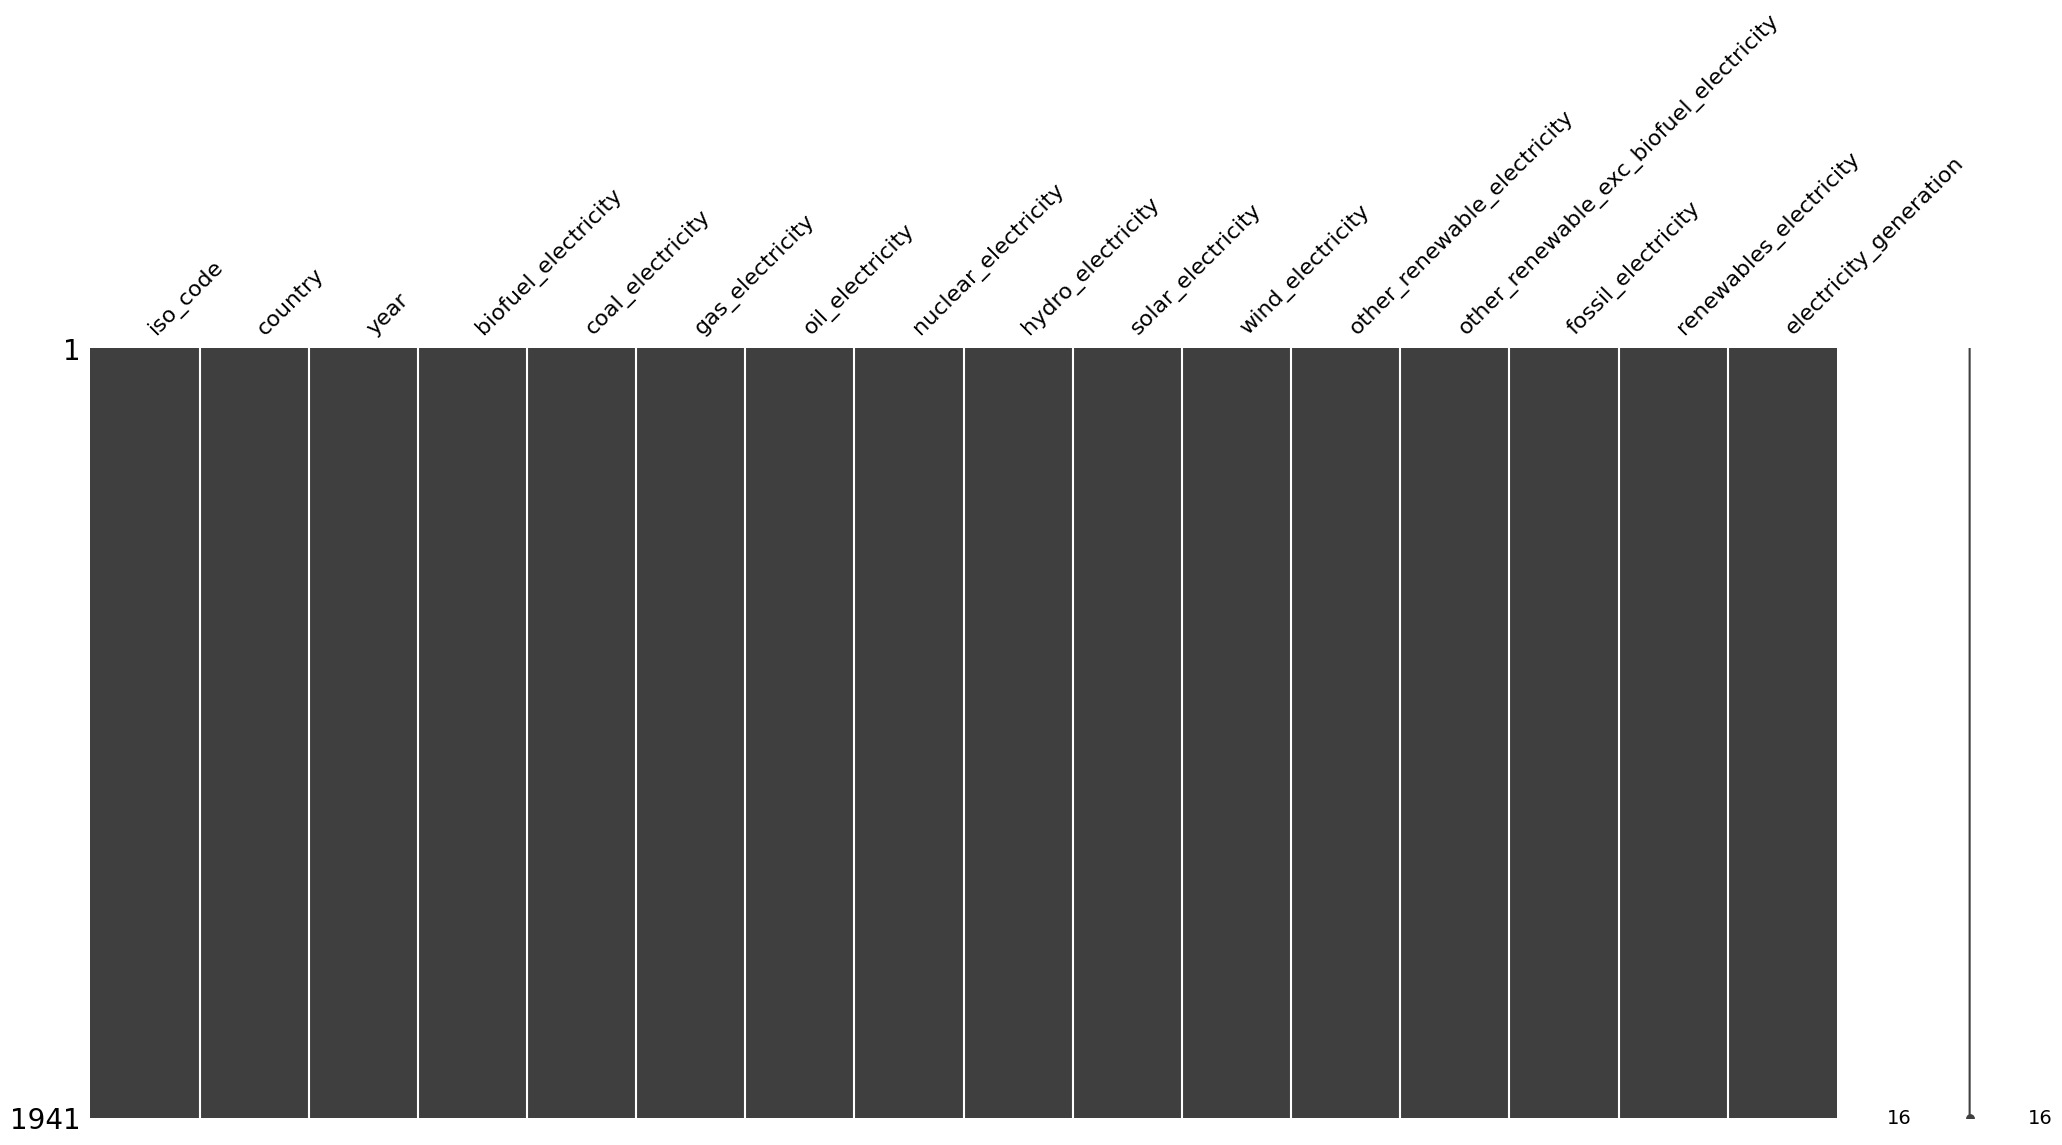

In [174]:
msno.matrix(prepro_iso_full)

## Select last year

In [175]:
prepro_iso_full.year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [176]:
len(prepro_iso_full.country.unique())

208

In [177]:
len(prepro_iso_full[prepro_iso_full.year ==2019]["country"].unique())

208

Aunque el ultimo año es el 2020, tiene menor cantidad de registros por lo cual optamos por el 2019 que tiene a todos los paises

In [178]:
df_2019= prepro_iso_full[prepro_iso_full.year ==2019].copy()

In [185]:
df_2019=df_2019[(df_2019.electricity_generation >0) & (df_2019.electricity_generation <25899)]

In [212]:
df_2019

,iso_code,country,year,biofuel_electricity,coal_electricity,gas_electricity,oil_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,fossil_electricity,renewables_electricity,electricity_generation
119,AFG,Afghanistan,2019,0.000,0.000,0.152,0.000,0.0,0.840,0.040,0.000,0.000,0.0,0.152,0.880,1.032
359,ALB,Albania,2019,0.000,0.000,0.000,0.000,0.0,5.154,0.022,0.000,0.000,0.0,0.000,5.176,5.176
479,DZA,Algeria,2019,0.000,0.000,73.616,0.000,0.0,0.106,0.615,0.011,0.000,0.0,73.616,0.732,74.348
519,ASM,American Samoa,2019,0.000,0.000,0.000,0.163,0.0,0.000,0.000,0.000,0.000,0.0,0.163,0.000,0.163
639,AGO,Angola,2019,0.253,0.000,1.284,1.074,0.0,9.850,0.018,0.000,0.253,0.0,2.357,10.121,12.478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16687,VEN,Venezuela,2019,0.000,0.000,37.042,0.000,0.0,52.041,0.006,0.071,0.000,0.0,37.042,52.118,89.160
16807,VNM,Vietnam,2019,0.126,133.008,50.997,1.255,0.0,67.393,5.910,0.760,0.126,0.0,185.259,74.189,259.449
17074,YEM,Yemen,2019,0.000,0.000,0.771,1.243,0.0,0.000,0.500,0.000,0.000,0.0,2.013,0.500,2.513
17311,ZMB,Zambia,2019,0.080,1.999,0.000,1.003,0.0,13.772,0.000,0.000,0.080,0.0,3.002,13.853,16.855


## Create percentage

In [201]:
ls_columns= df_2019.columns[3:-1]

In [206]:
df_2019_per= pd.DataFrame()
df_2019_per= df_2019.iloc[:,:3]
for column in ls_columns:
    ls_aux= []
    for _,row in df_2019.iterrows():
        ls_aux.append(row[column]/ row["electricity_generation"])
    name= column+ '%'
    df_2019_per[name]= ls_aux

In [209]:
df_2019_per.sort_values(by= 'biofuel_electricity%')

,iso_code,country,year,biofuel_electricity%,coal_electricity%,gas_electricity%,oil_electricity%,nuclear_electricity%,hydro_electricity%,solar_electricity%,wind_electricity%,other_renewable_electricity%,other_renewable_exc_biofuel_electricity%,fossil_electricity%,renewables_electricity%
119,AFG,Afghanistan,2019,0.000000,0.000000,0.147287,0.000000,0.000000,0.813953,0.038760,0.000000,0.000000,0.000000,0.147287,0.852713
8736,LBR,Liberia,2019,0.000000,0.000000,0.000000,0.990000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.990000,0.010000
8696,LSO,Lesotho,2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.998155,0.001845,0.000000,0.000000,0.000000,0.000000,1.000000
8656,LBN,Lebanon,2019,0.000000,0.000000,0.445572,0.535812,0.000000,0.014479,0.003848,0.000289,0.000000,0.000000,0.981384,0.018616
8540,KGZ,Kyrgyzstan,2019,0.000000,0.071159,0.000000,0.005256,0.000000,0.923585,0.000000,0.000000,0.000000,0.000000,0.076482,0.923585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,FIN,Finland,2019,0.188493,0.066397,0.061544,0.058451,0.352215,0.180902,0.001332,0.090666,0.188493,0.000000,0.186392,0.461393
4564,DNK,Denmark,2019,0.193538,0.141005,0.062038,0.037418,0.000000,0.000504,0.032178,0.533320,0.193538,0.000000,0.240461,0.759539
6775,GTM,Guatemala,2019,0.205685,0.149422,0.000000,0.256720,0.000000,0.326828,0.016864,0.024376,0.225790,0.020105,0.406142,0.593858
8952,LUX,Luxembourg,2019,0.226750,0.000000,0.203762,0.080460,0.000000,0.097179,0.125392,0.266458,0.226750,0.000000,0.284222,0.714734


# Clustering

In [214]:
ls_sum_column= ["biofuel_electricity%","nuclear_electricity%", "fossil_electricity%", "renewables_electricity%"]

In [215]:
linkage_data = linkage(df_2019_per[ls_sum_column], method='ward', metric='euclidean')

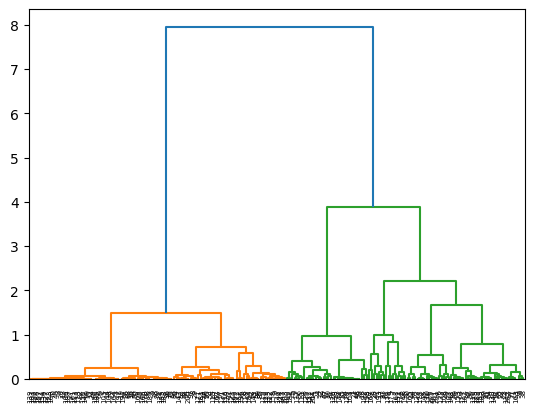

In [218]:
dendrogram(linkage_data)
plt.show()

In [246]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_2019_per[ls_sum_column])

In [247]:
df_2019_per["Cluster 1"]= labels

In [248]:
aux=df_2019_per[["country","Cluster 1"]+ls_sum_column].copy()

In [249]:
aux.groupby("Cluster 1").count()["country"]/ len(aux)

Cluster 1
0    0.237864
1    0.519417
2    0.165049
3    0.077670
Name: country, dtype: float64

In [251]:
aux.groupby("Cluster 1").mean()

/tmp/ipykernel_919/2978342100.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux.groupby("Cluster 1").mean()


,biofuel_electricity%,nuclear_electricity%,fossil_electricity%,renewables_electricity%
Cluster 1,,,,
0,0.037741,0.004971,0.506049,0.488932
1,0.008589,0.008705,0.915812,0.075434
2,0.030180,0.005139,0.100324,0.894542
3,0.052808,0.371533,0.314743,0.313723


In [256]:
aux[aux["Cluster 1"]==2]

,country,Cluster 1,biofuel_electricity%,nuclear_electricity%,fossil_electricity%,renewables_electricity%
119,Afghanistan,2,0.000000,0.00000,0.147287,0.852713
359,Albania,2,0.000000,0.00000,0.000000,1.000000
639,Angola,2,0.020276,0.00000,0.188892,0.811108
1158,Austria,2,0.063329,0.00000,0.230335,0.769665
1723,Belize,2,0.312775,0.00000,0.035242,0.964758
1843,Bhutan,2,0.000000,0.00000,0.000000,1.000000
2233,Brazil,2,0.088590,0.02474,0.144756,0.830504
3010,Canada,2,0.017181,0.14999,0.179834,0.670176
3128,Central African Republic,2,0.000000,0.00000,0.006623,0.993377
3585,Colombia,2,0.017551,0.00000,0.260448,0.739552


In [253]:
df_2019["Cluster 1"]= labels

/tmp/ipykernel_919/2951275656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["Cluster 1"]= labels


In [254]:
df_2019.to_excel("Paises.xlsx", index=False)

In [257]:
df_2019[df_2019["Cluster 1"]==2]

,iso_code,country,year,biofuel_electricity,coal_electricity,gas_electricity,oil_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,fossil_electricity,renewables_electricity,electricity_generation,Cluster 1
119,AFG,Afghanistan,2019,0.000,0.000,0.152,0.000,0.000,0.840,0.040,0.000,0.000,0.000,0.152,0.880,1.032,2
359,ALB,Albania,2019,0.000,0.000,0.000,0.000,0.000,5.154,0.022,0.000,0.000,0.000,0.000,5.176,5.176,2
639,AGO,Angola,2019,0.253,0.000,1.284,1.074,0.000,9.850,0.018,0.000,0.253,0.000,2.357,10.121,12.478,2
1158,AUT,Austria,2019,4.536,1.633,11.618,3.247,0.000,41.638,1.353,7.600,4.537,0.000,16.498,55.128,71.626,2
1723,BLZ,Belize,2019,0.142,0.000,0.000,0.016,0.000,0.295,0.001,0.000,0.142,0.000,0.016,0.438,0.454,2
1843,BTN,Bhutan,2019,0.000,0.000,0.000,0.000,0.000,6.608,0.001,0.001,0.000,0.000,0.000,6.610,6.610,2
2233,BRA,Brazil,2019,54.514,24.782,56.701,7.593,15.224,393.898,6.655,55.986,54.514,0.000,89.076,511.053,615.353,2
3010,CAN,Canada,2019,10.865,48.266,61.212,4.249,94.854,377.979,4.272,30.532,11.037,0.172,113.727,423.820,632.401,2
3128,CAF,Central African Republic,2019,0.000,0.000,0.000,0.001,0.000,0.150,0.000,0.000,0.000,0.000,0.001,0.150,0.151,2
3585,COL,Colombia,2019,1.317,6.586,12.070,0.889,0.000,53.987,0.132,0.060,1.317,0.000,19.544,55.496,75.040,2
